In [7]:
import pandas as pd
df_mall = pd.read_csv('/content/Mall_Customers.csv')
df_mall.info()
df_mall.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      190 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


In [8]:
df_mall.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income (k$)        10
Spending Score (1-100)     0
dtype: int64

In [9]:
df_mall = df_mall.bfill(axis='columns')
df_mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D object at 0x7a19c73bb790>, <matplotlib.lines.Line2D object at 0x7a19c73bba30>], 'caps': [<matplotlib.lines.Line2D object at 0x7a19c73bbcd0>, <matplotlib.lines.Line2D object at 0x7a19c73bbf70>], 'boxes': [<matplotlib.lines.Line2D object at 0x7a19c73bb4f0>], 'medians': [<matplotlib.lines.Line2D object at 0x7a19c73dc250>], 'fliers': [<matplotlib.lines.Line2D object at 0x7a19c73dc4f0>], 'means': []}
{'whiskers': [<matplotlib.lines.Line2D object at 0x7a19c73dcbb0>, <matplotlib.lines.Line2D object at 0x7a19c73dce50>], 'caps': [<matplotlib.lines.Line2D object at 0x7a19c73dd0f0>, <matplotlib.lines.Line2D object at 0x7a19c73dd390>], 'boxes': [<matplotlib.lines.Line2D object at 0x7a19c73dc910>], 'medians': [<matplotlib.lines.Line2D object at 0x7a19c73dd630>], 'fliers': [<matplotlib.lines.Line2D object at 0x7a19c73dd8d0>], 'means': []}


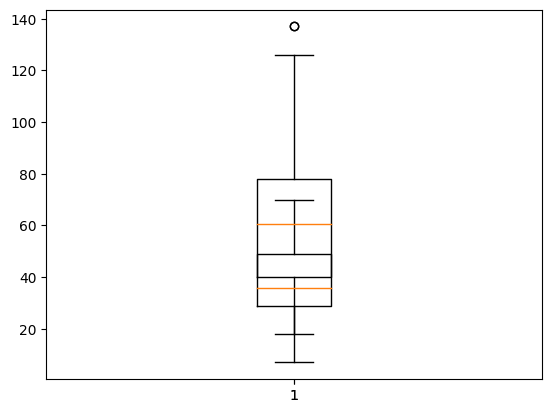

In [10]:
import matplotlib.pyplot as plt
print(plt.boxplot(df_mall['Age']))
print(plt.boxplot(df_mall['Annual Income (k$)']))
df_mall = df_mall[df_mall['Annual Income (k$)']<130]

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [12]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df_mall['Gender']=lbl.fit_transform(df_mall['Gender'])
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [13]:
km = KMeans(n_clusters=3)
df_mall['Gender'] = lbl.fit_transform(df_mall['Gender'])
y_predicted = km.fit_predict(df_mall[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']])
df_mall['cluster']=y_predicted
print(df_mall.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  CustomerID  Gender Age Annual Income (k$) Spending Score (1-100)  cluster
0          1       1  19               15.0                     39        0
1          2       1  21               15.0                     81        0
2          3       0  20               16.0                      6        0
3          4       0  23               16.0                     77        0
4          5       0  31               17.0                     40        0


In [14]:
km.cluster_centers_
print(km.cluster_centers_)

[[ 0.392      40.504      43.592      48.336     ]
 [ 0.475      32.275      85.225      82.275     ]
 [ 0.54545455 41.03030303 84.75757576 18.36363636]]


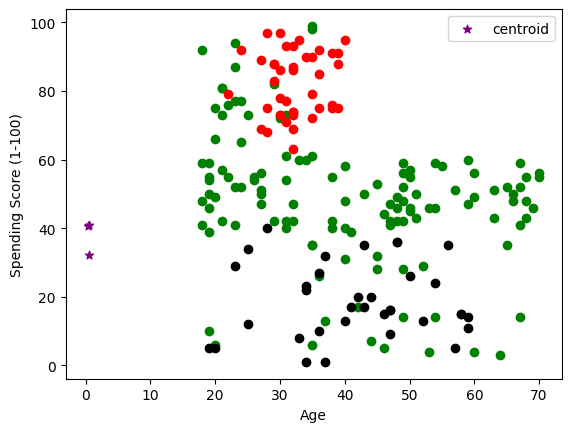

In [15]:
df1 = df_mall[df_mall.cluster==0]
df2 = df_mall[df_mall.cluster==1]
df3 = df_mall[df_mall.cluster==2]
plt.scatter(df1.Age,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.Age,df2['Spending Score (1-100)'],color='red')
plt.scatter(df3.Age,df3['Spending Score (1-100)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

  CustomerID  Gender       Age Annual Income (k$)  Spending Score (1-100)  \
0          1       1  0.019231               15.0                0.387755   
1          2       1  0.057692               15.0                0.816327   
2          3       0  0.038462               16.0                0.051020   
3          4       0  0.096154               16.0                0.775510   
4          5       0  0.250000               17.0                0.397959   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


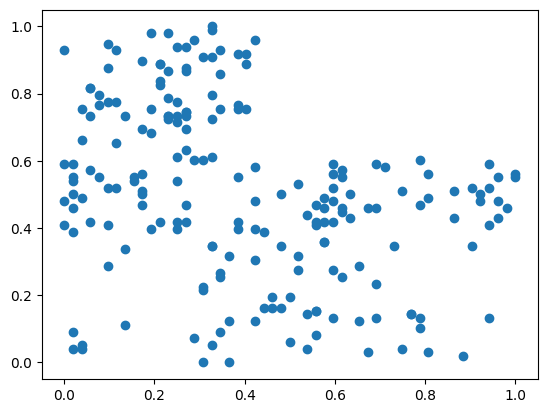

In [16]:
scaler = MinMaxScaler()
scaler.fit(df_mall[['Spending Score (1-100)']])
df_mall['Spending Score (1-100)'] = scaler.transform(df_mall[['Spending Score (1-100)']])
scaler.fit(df_mall[['Age']])
df_mall['Age'] = scaler.transform(df_mall[['Age']])
print(df_mall.head())
plt.scatter(df_mall.Age,df_mall['Spending Score (1-100)'])

In [17]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_mall)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

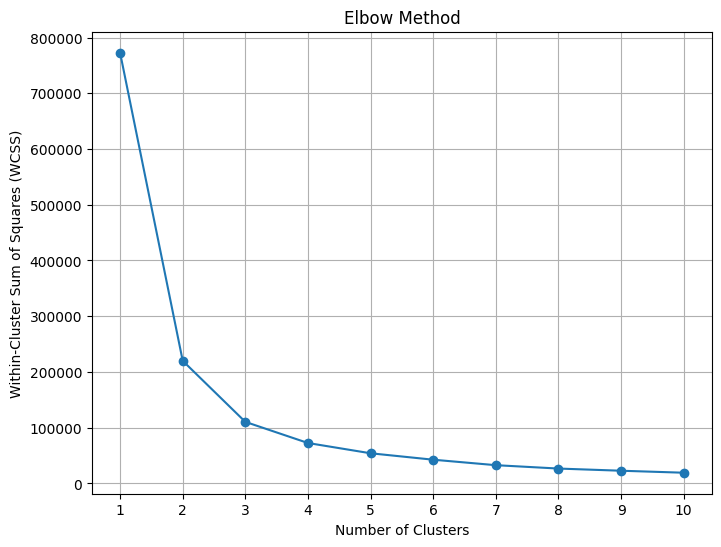

In [18]:
# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_mall[['Age','Spending Score (1-100)']])
df_mall['cluster']=y_predicted
df_mall.head(25)
print(km.cluster_centers_)

[[0.20535714 0.73845967]
 [0.7323201  0.40108624]
 [0.32766272 0.24038462]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

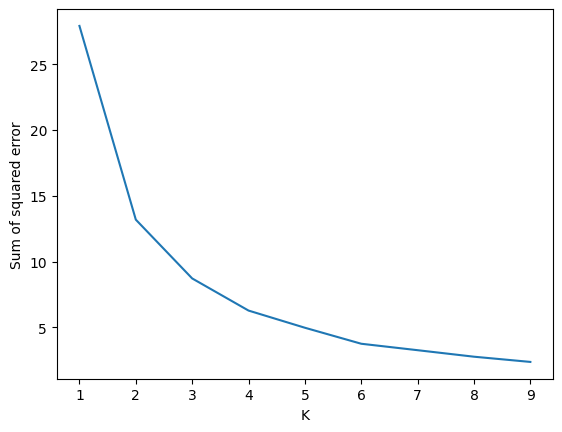

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Step 3: Perform K-means clustering and sillhouette score
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_mall[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)